In [1]:
import numpy as np
import IM_rank_correlations as IMR
import measure_classification as mc;
import compute_invariance as compute_invariance;


In [2]:
ranks_matrix = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
measures_arr = ranks_matrix.measures_arr;
measures_dict = ranks_matrix.measures_dict;

In [3]:
# np.max(ranks_matrix.distance_uppertriangle)

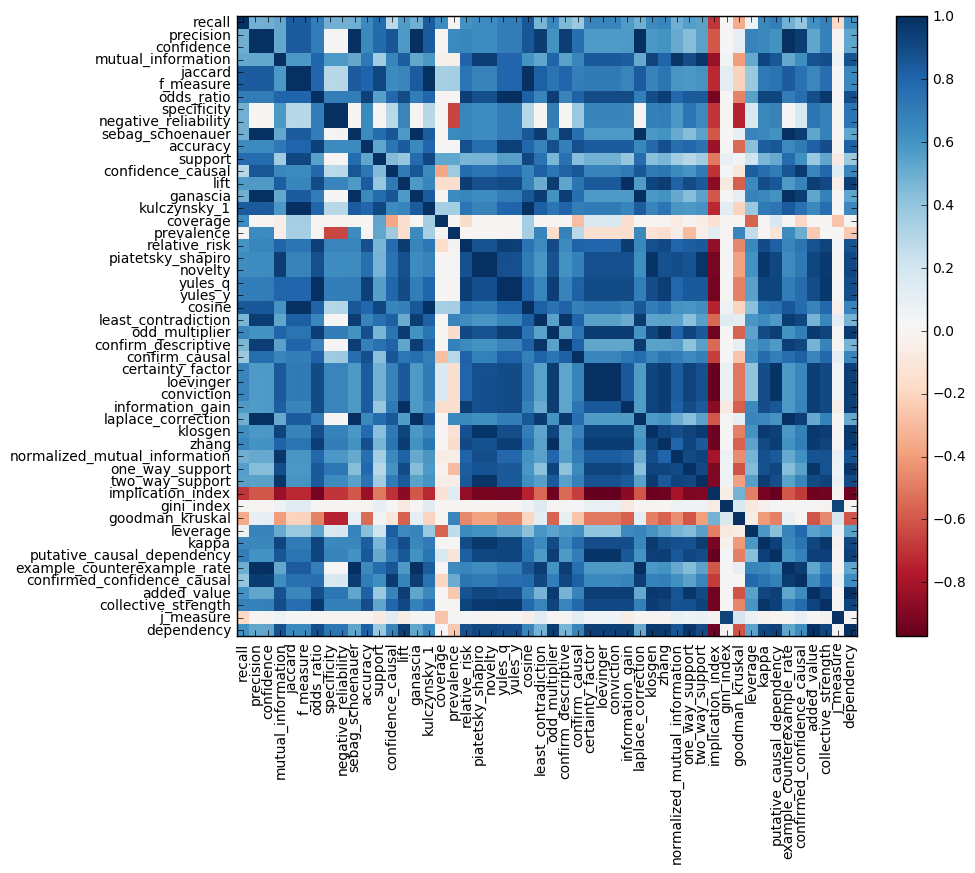

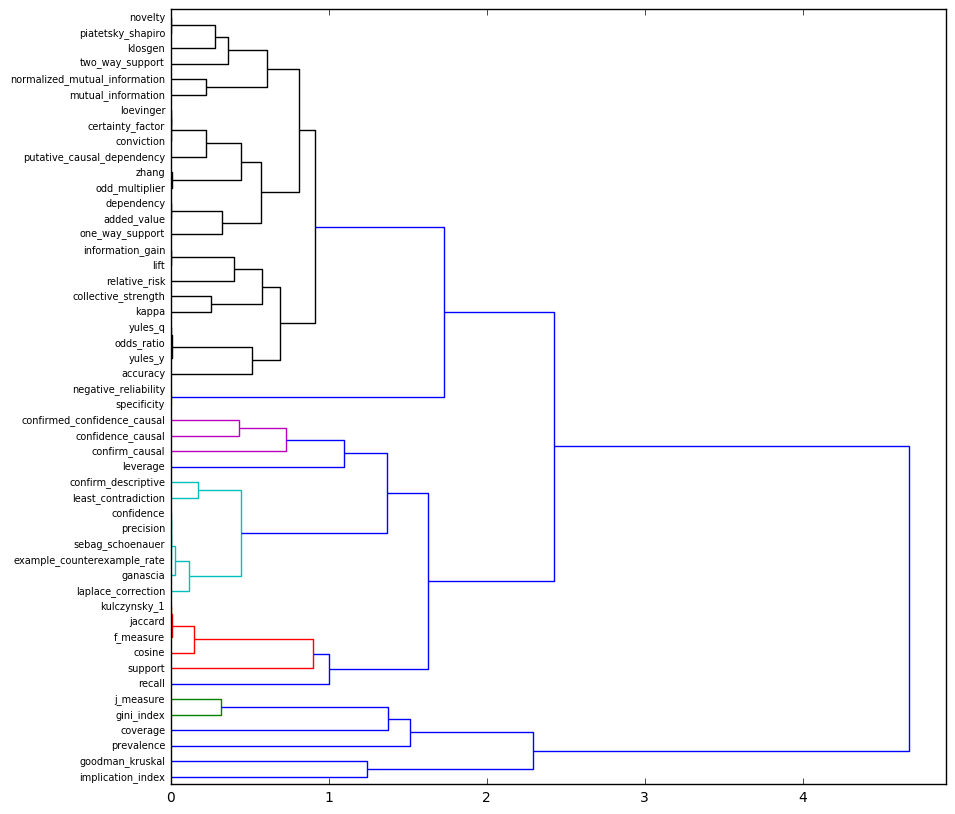

In [4]:
ranks_matrix.visualize()

35


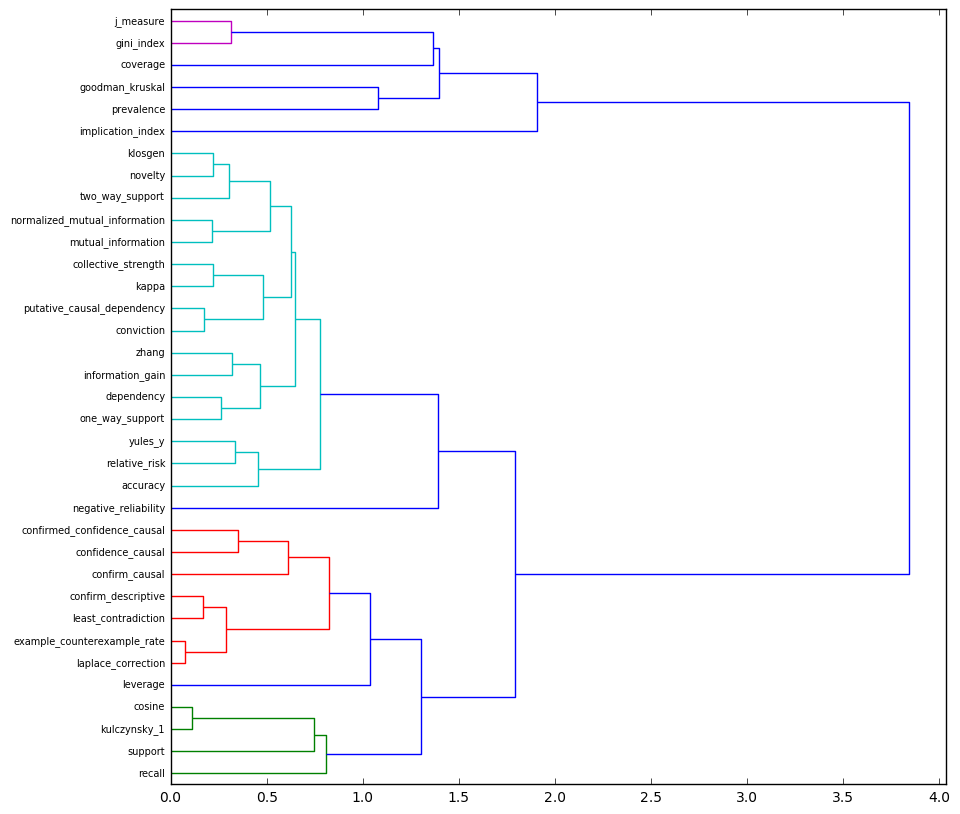

In [5]:
def find_redundant(measures_arr, ranks_matrix):
#     print(len(measures_arr))
    for i in range(len(measures_arr)):
        for j in range(len(measures_arr)):
            if (i > j):
#                 print(ranks_matrix)
                if (np.around(ranks_matrix.corr_spearman[i][j], 3) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
                    return(j);

# remove redundant measures
while find_redundant(measures_arr, ranks_matrix):
    i = find_redundant(measures_arr, ranks_matrix);
    measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
print(len(measures_arr))
ranks_matrix.show_dendrogram()

In [6]:
def find_outlier(clusters):
    arr = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 1:
            arr.append(clusters[i]);
    return np.array(arr);


# while len(find_outlier(clusters)):
#     idx_outliers = find_outlier(clusters);
#     print(measures_arr[idx_outliers]);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(idx_outliers);
#     clusters = ranks_matrix.form_clusters(n_clusters);

In [7]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [8]:
def cluster_set_1():
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(10, rm);
    misc_cluster = np.array([], int);
    misc_cluster = np.append(misc_cluster, clusters[2]);
    misc_cluster = np.append(misc_cluster, clusters[4]);
    misc_cluster = np.append(misc_cluster, clusters[5]);
    misc_cluster = np.append(misc_cluster, clusters[6]);
    misc_cluster = np.append(misc_cluster, clusters[7]);
    misc_cluster = np.append(misc_cluster, clusters[8]);
    misc_cluster = np.append(misc_cluster, clusters[9]);

    clusters_new = [];
    clusters_new.append(clusters[0]);
    clusters_new.append(clusters[1]);
    clusters_new.append(clusters[3]);
    clusters_new.append(misc_cluster);

    clusters_new = np.array(clusters_new);

#     print([measures_arr[clusters_new[i]] for i in range(len(clusters_new))])
    # print(clusters_new)
    return (clusters_new, md, ma);


In [9]:
# def cluster_set_2():
    
#     from Measures import form_measures_dict;
#     rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
#     ma = rm.measures_arr;
#     md = rm.measures_dict;
#     rm.compute_correlation();
    
#     def form_cluster_array(md):
#         clusters = [];
#         clusters.append([md['cosine'], md['kulczynsky_1']]);
#         clusters.append([md['support']]);
#         clusters.append([md['recall']]);
#         clusters.append([md['leverage']]);
#         clusters.append([md['example_counterexample_rate'], md['laplace_correction']]);
#         clusters.append([md['confirm_descriptive'], md['least_contradiction']]);
#         clusters.append([md['confirm_causal']]);
#         clusters.append([md['confirmed_confidence_causal'], md['confidence_causal']]);
#         clusters.append([md['negative_reliability']]);
#         clusters.append([md['accuracy']]);
#         clusters.append([md['yules_y'], md['relative_risk']]);
#         clusters.append([md['dependency'], md['one_way_support']]);
#         clusters.append([md['information_gain'], md['zhang']]);
#         clusters.append([md['putative_causal_dependency'], md['conviction']]);
#         clusters.append([md['collective_strength'], md['kappa']]);
#         clusters.append([md['mutual_information'], md['normalized_mutual_information']]);
#         clusters.append([md['two_way_support']]);
#         clusters.append([md['novelty'], md['klosgen']]);
#         clusters.append([md['implication_index']]);
#         clusters.append([md['prevalence']]);
#         clusters.append([md['goodman_kruskal']]);
#         clusters.append([md['coverage']]);
#         clusters.append([md['j_measure'], md['gini_index']]);

#         clusters = np.array(clusters);
#         return clusters
    
#     clusters = form_cluster_array(md);
    
#     clusters_flat = np.empty(0, int);
    
#     for cluster in clusters:
#         clusters_flat = np.append(clusters_flat, cluster);
    
#     ma = ma[clusters_flat];
#     md = form_measures_dict(ma);

#     clusters = form_cluster_array(md);

#     return (clusters, md, ma);

# # (clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();
# # print(len(measures_arr_2))

In [10]:
def cluster_set_2():
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

In [11]:
def cluster_set_3():
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(4, rm);
    return (clusters, md, ma);

In [12]:
def cluster_set_4():
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    
    #removing the cluster with the outliers
    md, ma = rm.remove_outliers(clusters[1]);
    
    clusters = form_clusters(5, rm);
    
    return (clusters, md, ma);

# c,d,a = cluster_set_4();
# print_cluster_set(c,a)

In [13]:
def cluster_set_tew_2():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['leverage'], 
                         md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information'], md['laplace_correction']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk'], md['coverage'], md['implication_index']]);
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_2, measures_dict_tew_2, measures_arr_tew_2) = cluster_set_tew_2();

In [14]:
def cluster_set_tew_4():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_4, measures_dict_tew_4, measures_arr_tew_4) = cluster_set_tew_4();

In [15]:
def cluster_set_tew_5():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang']]);
        clusters.append([md['yules_y'], md['confirm_causal'], md['putative_causal_dependency'], 
                         md['klosgen'], md['dependency'], md['one_way_support'],
                         md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_5, measures_dict_tew_5, measures_arr_tew_5) = cluster_set_tew_5();

In [41]:
def return_homogeneity(cluster_set, measures_dict):
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);
#     print(properties_array.shape, len(cluster_set))
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(np.array(cluster_vector))
    for idx, property_vector in enumerate(cluster_property_array):
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        print([int(np.sum(properties_array[:, idx])), int( len(properties_array[:, idx]) - np.sum(properties_array[:, idx])) ])
#         print(property_names[idx]);
#         print(entropy_array[idx]);
#         print(support_array[idx]);
#         print(np.array2string(property_vector, separator=','));
#         print(homo)

return_homogeneity(clusters_4, measures_dict_4);

[ 4 16  1  7  1]
[12, 17]
[29, 0]
[24, 5]
[11, 18]
[1, 28]
[2, 27]
[7, 22]
[6, 23]
[26, 3]
[12, 17]
[29, 0]
[12, 17]
[24, 5]
[6, 23]
[17, 12]
[1, 28]
[12, 17]
[2, 27]
[12, 17]
[5, 24]
[14, 15]
[0, 29]
[18, 11]
[10, 19]
[28, 1]
[24, 5]
[29, 0]
[11, 18]
[29, 0]
[1, 28]
[29, 0]
[2, 27]
[29, 0]
[7, 22]
[29, 0]
[6, 23]
[29, 0]
[26, 3]
[29, 0]
[10, 19]
[25, 4]
[1, 28]
[24, 5]
[2, 27]
[24, 5]
[7, 22]
[24, 5]
[3, 26]
[27, 2]
[22, 7]
[28, 1]
[1, 28]
[11, 18]
[2, 27]
[11, 18]
[6, 23]
[12, 17]
[2, 27]
[15, 14]
[10, 19]
[27, 2]
[1, 28]
[2, 27]
[1, 28]
[7, 22]
[0, 29]
[7, 22]
[1, 28]
[26, 3]
[2, 27]
[7, 22]
[0, 29]
[8, 21]
[2, 27]
[26, 3]
[0, 29]
[13, 16]
[5, 24]
[28, 1]
[5, 24]
[27, 2]


In [18]:
# input a cluster set and specify which property and output will be the measures satisfying the properties and their cluster
def cluster_measures_satisfying_property(cluster_set, measures_arr, measures_dict):
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);
    for idx, cluster in enumerate(cluster_set):
        for idc, measure in enumerate(cluster):
            if not (properties_array[measure, 8]):
                print(measures_arr[measure], idx)
                
cluster_measures_satisfying_property(clusters_tew_2, measures_arr_tew_2, measures_dict_tew_2)

mutual_information 0
normalized_mutual_information 0
laplace_correction 0
implication_index 1


In [25]:
(clusters_1, measures_dict_1, measures_arr_1) = cluster_set_1();
(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();
(clusters_3, measures_dict_3, measures_arr_3) = cluster_set_3();
(clusters_4, measures_dict_4, measures_arr_4) = cluster_set_4();
# (clusters_tew, measures_dict_tew, measures_arr_tew) = cluster_set_tew();


In [ ]:
(properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

In [ ]:
properties_array[:,8], measures_arr[1]

In [ ]:
return_homogeneity(clusters_4, measures_dict_4)

In [ ]:
(properties_array, property_names, support_array) = compute_invariance.compute_property_vectors(measures_dict);
X,Y = mc.initialize_X_Y(measures_arr, properties_array);

In [ ]:
X = properties_array;
Y = mc.assign_clusters_to_Y(clusters_1, Y);
X.shape

In [ ]:
# import scipy.spatial.distance as ssd
# import scipy.misc as sm;
# import numpy as np;

# for c in range(len(clusters)):
#     n= sm.comb(len(clusters[c]),2);
#     arr = np.zeros(n, float);
# #     print(c)
#     k=0;
#     for i in clusters[c]:
#         for j in clusters[c]:
#             if (i > j):
# #                 print(measures_arr[i], measures_arr[j]);
# #                 print(X[i], X[j])
#                 arr[k] = ssd.hamming(X[i], X[j]);
#                 k += 1;
#     print(np.average(arr))
# # print(measures_arr[clusters[0][1]], measures_arr[clusters[0][2]])
# # ssd.jaccard(X[clusters[0][1]], X[clusters[0][4]])

In [ ]:
np.sum(X[:,0])

In [ ]:
predictions, tree_classifier = mc.classify_decision_tree(X,Y, criterion='gini');
print(tree_classifier.score(X,Y))

In [ ]:
mc.export_to_pdf(tree_classifier, n_clusters, len(measures_arr))

In [ ]:
# to_remove = np.empty(0, int);
# arr = measures_arr[(X[:,344] == -1) & ((X[:,56] == 1)) & ((X[:,387] == -1)) & ((X[:,419] == -1))]

# for measure in measures_arr:
#     if measure not in arr:
#         to_remove = np.append(to_remove, measures_dict[measure]);
        
# measures_dict, measures_arr = ranks_matrix.remove_outliers(to_remove);

In [ ]:
for support in support_array:
    print(support)

In [ ]:
# measures_arr[(X[:,0] == 0) & ((X[:,1] == 0)) & ((X[:,2] == 0)) & ((X[:,4] == 0)) & ((X[:,5] == 0)) & ((X[:,6] == 0)) & ((X[:,7] == 0))]
# measures_arr[(X[:,344] == -1) & ((X[:,56] == 1)) & ((X[:,387] == -1)) & ((X[:,419] == -1))]

In [ ]:
# np.around(ranks_matrix.corr_spearman[measures_dict['example_counterexample_rate'], measures_dict['laplace_correction']], 3)

# X = np.delete(X, 3, axis=1)

In [ ]:
# ranks_matrix.show_dendrogram()

In [ ]:
# a = np.empty((len(X[0,:]),len(clusters)), float);
# for p in range(len(clusters)):
#     for i in range(len(X[0,:])):
# #         a[i][p] = np.sum(X[clusters[p],i])/len(clusters[p]);
#         a[i][p] = np.sum(X[clusters[p],i]);
#         print(a[i][p])
# #     print('----')
# # a = (1 + a)/2;

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=[15,30], ncols=1, nrows=1);
plt.imshow(a, interpolation='none', cmap=plt.cm.RdBu);
# plt.colorbar();
plt.show()

In [ ]:
import scipy.misc as sm

In [ ]:
7 + (2 * sm.comb(7,2)) + (4 * sm.comb(7,3)) + (8 * sm.comb(7,4)) + (16 * sm.comb(7,5))

In [ ]:
7 + (2 * sm.comb(7,2)) + (4 * sm.comb(7,3)) + (8 * sm.comb(7,4))

In [ ]:
import itertools
inv = ['P2', 'P3', 'O1', 'O2', 'O3', 'O4', 'O5'];
for i,j,l,m,n in itertools.combinations(range(7),5):
    print(inv[i] + ' and ' + inv[j] + ' and ' + inv[l] + ' and ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' and ' + inv[l] + ' and ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' and ' + inv[j] + ' or ' + inv[l] + ' and ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' or ' + inv[l] + ' and ' + inv[m] + ' and ' + inv[n]);

    print(inv[i] + ' and ' + inv[j] + ' and ' + inv[l] + ' or ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' and ' + inv[l] + ' or ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' and ' + inv[j] + ' or ' + inv[l] + ' or ' + inv[m] + ' and ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' or ' + inv[l] + ' or ' + inv[m] + ' and ' + inv[n]);

    print(inv[i] + ' and ' + inv[j] + ' and ' + inv[l] + ' and ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' and ' + inv[l] + ' and ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' and ' + inv[j] + ' or ' + inv[l] + ' and ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' or ' + inv[l] + ' and ' + inv[m] + ' or ' + inv[n]);

    print(inv[i] + ' and ' + inv[j] + ' and ' + inv[l] + ' or ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' and ' + inv[l] + ' or ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' and ' + inv[j] + ' or ' + inv[l] + ' or ' + inv[m] + ' or ' + inv[n]);
    print(inv[i] + ' or ' + inv[j] + ' or ' + inv[l] + ' or ' + inv[m] + ' or ' + inv[n]);



In [ ]:


def gini(arr):
    g = 0;
    n = len(arr);
    N = np.sum(arr);
    p = arr / N;
    arr = np.sort(arr);
    for i in range(n):
        g += 2 * (i+1) * arr[i];
    g = g / (n*N) - (n+1)/n;
    return g;

def homogeneity(P, C):
#     C = [4, 17, 2];
    N_C = np.sum(C);
    N_P = np.sum(P);
    n = len(C);
    h = 0;
    for i in range(n):
        if(P[i]):
            h -= C[i]**0.5 * np.log(P[i]/N_P) * (P[i]/C[i]);
    return 1- h/(N_C);

In [ ]:
print(homogeneity([4, 17, 2], [4, 17, 2]))
print(homogeneity([2, 16, 2], [4, 17, 2]))
print(homogeneity([4, 11, 2], [4, 17, 2]))
print(homogeneity([2, 11, 2], [4, 17, 2]))
print(homogeneity([2, 11, 1], [4, 17, 2]))
print(homogeneity([0, 16, 0], [4, 17, 2]))

In [ ]:
p = np.arange(0, 20, 0.01);
e = np.zeros(len(p));
g = np.zeros(len(p));

for i in range(len(p)):
    e[i] = entropy([p[i], 20-p[i]]);
#     h[i] = gini([p[i], 20-p[i]]);   

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(p,e);
# plt.scatter(p,g);

plt.show()

In [ ]:
print(gini([4, 17, 2]))
print(gini([4, 11, 2]))
print(gini([2, 11, 2]))
print(gini([2, 16, 2]))
print(gini([4, 16, 2]))

In [ ]:
def entropy(vector):
    N = np.sum(vector);
    prob_vector = vector/N;
    n = len(vector);
    h = 0;
    for i in range(n):
        if(prob_vector[i]):
            h -= prob_vector[i] * np.log2(prob_vector[i]);
#             h -= vector[i] * np.log2(vector[i]);

    return h/np.log2(n);

print(entropy([2,27])*29/35)


In [ ]:
ranks_matrix.visualize()